# Classification

The types of classification models we will look at here are the following

<ul>
    <li>Logistic Regression</li>
    <li>K-Nearest Neighbours</li>
    <li>Support Vector Classification with a linear kernel</li>
    <li>Support Vector Classification with a gaussian kernel</li>
    <li>Naive Bayes Classification</li>
    <li>Decision Tree Classification</li>
    <li>Random Forest Classification</li>                
</ul>

The required dataset can be found at <b>datasets/classification.csv</b>

### Data Import and Preprocessing

In [29]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = (6,6)

dataset = pd.read_csv('datasets/classification.csv')
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, -1].values

In [5]:
dataset.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


This dataset contains a binary flag (Purchased) which indicates if the described user has purchased a car in the past 12 months. Here we will only be using 2 IV (Age/Salary) to predict `Purchased`.

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

sc_x = StandardScaler()
X = sc_x.fit_transform(X)
# this will normalize values of X_age, X_salary

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

### Helper Methods

In [31]:
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

# For Visualising the dataset and prediction results
def _get_pyplot_object(X, y, classifier, title, xlabel, ylabel):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.legend()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)    
    return plt

### 1. Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

In [23]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[50,  3],
       [11, 16]])

#### According to the confusion matrix, Our logistic regression model got 14 of 80 predictions wrong

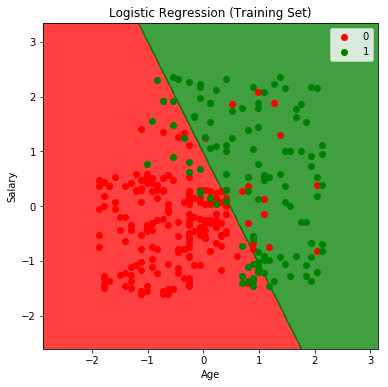

In [38]:
plt_training_data = _get_pyplot_object(X_train, y_train, log_reg, 'Logistic Regression (Training Set)', 'Age', 'Salary')
plt_training_data.show()

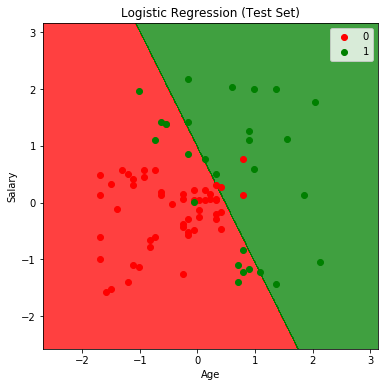

In [33]:
plt_training_data = _get_pyplot_object(X_test, y_test, log_reg, 'Logistic Regression (Test Set)', 'Age', 'Salary')
plt_training_data.show()

##### The plots above visualize the decision boundary and spread of Independent values / Dependent variable. Notice how the X and Y Axis show values between -2 to 2. This is because we scaled values of X in our preprocessing step

### 2. K-Nearest Neighbours

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_2 = knn.predict(X_test)

In [36]:
cm = confusion_matrix(y_test, y_pred_2)
cm

array([[52,  1],
       [ 5, 22]])

#### According to the confusion matrix, Our KNN classifer model got 6 of 80 predictions wrong

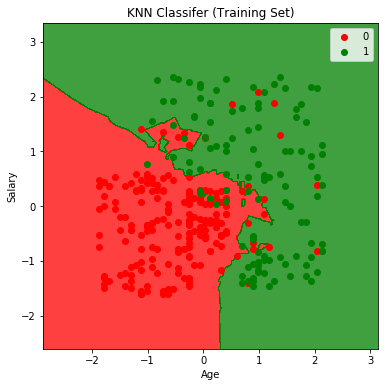

In [39]:
plt_training_data = _get_pyplot_object(X_train, y_train,knn, 'KNN Classifer (Training Set)', 'Age', 'Salary')
plt_training_data.show()

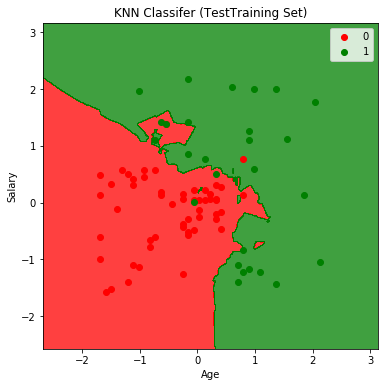

In [48]:
plt_training_data = _get_pyplot_object(X_test, y_test,knn, 'KNN Classifer (TestTraining Set)', 'Age', 'Salary')
plt_training_data.show()

#### The non-linear decision boundary generated by KNN gives us a much higher prediction accuracy when compared to the linear boundary generated by Logistic Regression

### 3. Support Vector Machines - Linear

In [49]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred_3 = svc.predict(X_test)

In [44]:
cm = confusion_matrix(y_test, y_pred_3)
cm

array([[50,  3],
       [12, 15]])

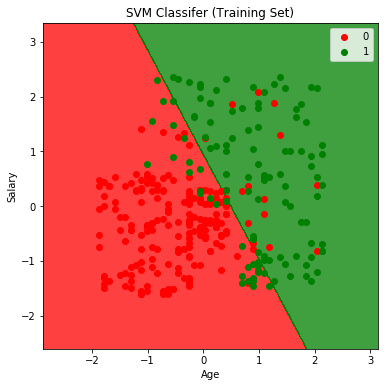

In [45]:
plt_training_data = _get_pyplot_object(X_train, y_train,svc, 'SVM Classifer (Training Set)', 'Age', 'Salary')
plt_training_data.show()

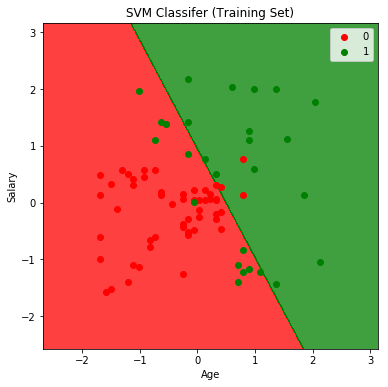

In [47]:
plt_training_data = _get_pyplot_object(X_test, y_test,svc, 'SVM Classifer (Test Set)', 'Age', 'Salary')
plt_training_data.show()

#### The linear boundary generated by this SVM will not be as accurate as the non-linear boundary drawn by KNN. This probably because straight line which bissects this dataset with higher precision is not available.

### 4. Support Vector Machines - Gaussian

#### We can solve the problem of straight line/plane not helping prediction by projecting the X_train values into a higher dimension, in which this projected dataset can now be split with a straight-line/plane

In [53]:
svc_gauss = SVC(kernel='rbf')
svc_gauss.fit(X_train, y_train)
y_pred_4 = svc_gauss.predict(X_test)

In [55]:
cm = confusion_matrix(y_test, y_pred_4)
cm

array([[50,  3],
       [ 2, 25]])

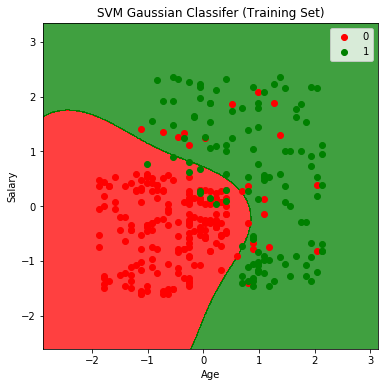

In [56]:
plt_training_data = _get_pyplot_object(X_train, y_train,svc_gauss, 'SVM Gaussian Classifer (Training Set)', 'Age', 'Salary')
plt_training_data.show()

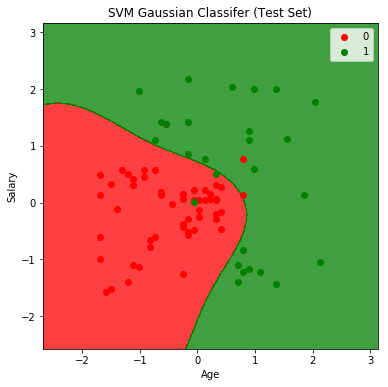

In [57]:
plt_training_data = _get_pyplot_object(X_test, y_test,svc_gauss, 'SVM Gaussian Classifer (Test Set)', 'Age', 'Salary')
plt_training_data.show()

### 5. Naive Bayes Classifier

In [61]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_5 = nb.predict(X_test)

In [62]:
cm = confusion_matrix(y_test, y_pred_5)
cm

array([[51,  2],
       [10, 17]])

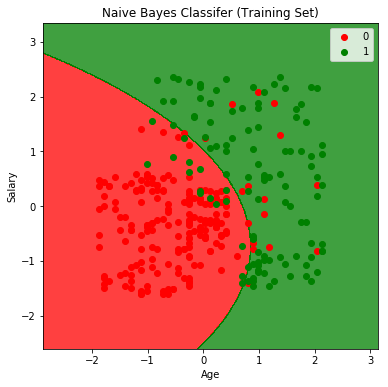

In [63]:
plt_training_data = _get_pyplot_object(X_train, y_train, nb, 'Naive Bayes Classifer (Training Set)', 'Age', 'Salary')
plt_training_data.show()

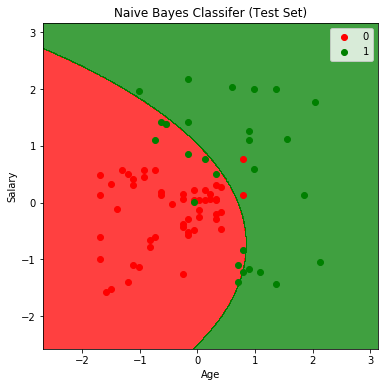

In [64]:
plt_training_data = _get_pyplot_object(X_test, y_test,nb, 'Naive Bayes Classifer (Test Set)', 'Age', 'Salary')
plt_training_data.show()

### 7. Decision Trees

In [77]:
from sklearn.tree import DecisionTreeClassifier
dt_class = DecisionTreeClassifier(criterion='entropy')
dt_class.fit(X_train, y_train)
y_pred_6 = dt_class.predict(X_test)

In [78]:
cm = confusion_matrix(y_test, y_pred_6)
cm

array([[48,  5],
       [ 9, 18]])

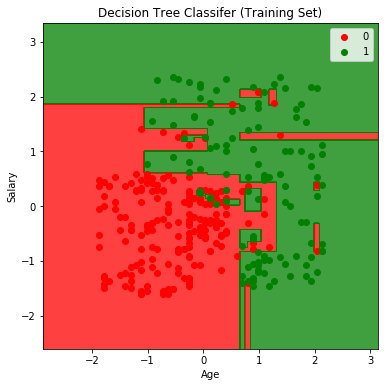

In [69]:
plt_training_data = _get_pyplot_object(X_train, y_train, dt_class, 'Decision Tree Classifer (Training Set)', 'Age', 'Salary')
plt_training_data.show()

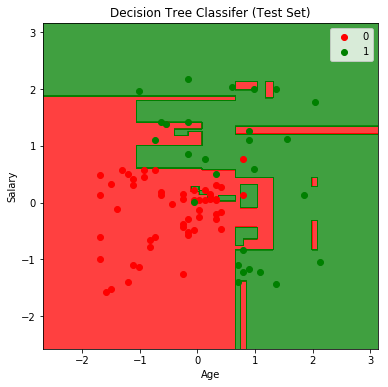

In [70]:
plt_training_data = _get_pyplot_object(X_test, y_test, dt_class, 'Decision Tree Classifer (Test Set)', 'Age', 'Salary')
plt_training_data.show()

### This Decision boundary looks like its been overfit, we can avoid this by defining other params of the tree such as minimum  leaves in terminal node, min number of records per split etc...

### 8. Random Forests

In [79]:
from sklearn.ensemble import RandomForestClassifier
rf_class = RandomForestClassifier(n_estimators=10)
rf_class.fit(X_train, y_train)
y_pred_7 = rf_class.predict(X_test)

In [80]:
cm = confusion_matrix(y_test, y_pred_7)
cm

array([[49,  4],
       [ 5, 22]])

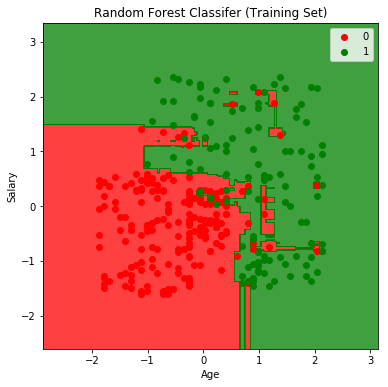

In [81]:
plt_training_data = _get_pyplot_object(X_train, y_train, rf_class, 'Random Forest Classifer (Training Set)', 'Age', 'Salary')
plt_training_data.show()

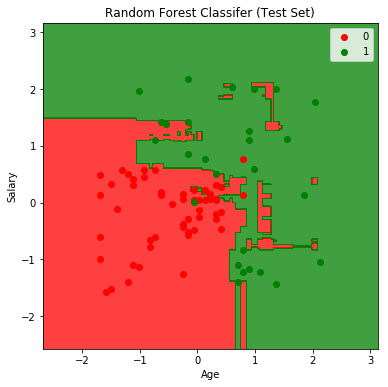

In [82]:
plt_training_data = _get_pyplot_object(X_test, y_test, rf_class, 'Random Forest Classifer (Test Set)', 'Age', 'Salary')
plt_training_data.show()